In [63]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [285]:
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

In [407]:
# The sigma value is equivalent to finding the isf of the normal distribution centered at 0 and size of 1.
def sigma(p_value):
     return (stats.norm.isf(p_value, loc=0., scale=1))

# 1

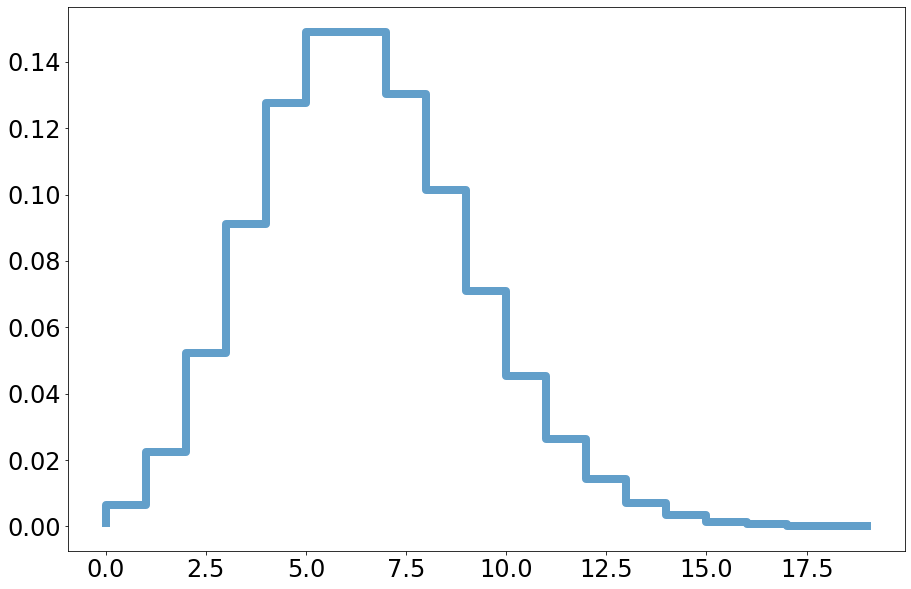

In [306]:
# I'm setting the 1-day average to 7, and the avergae number of gamma rays emitted from the hypothetical source is 15
mu = 7
y = 15
plt.tick_params(labelsize = 24)
x = np.arange(0,20)
plt.step(x, stats.poisson.pmf(x, mu, loc=0), linewidth = 8,alpha = 0.7)

## A

In [307]:
# Convert the above plot to an array to convolve
data_array = np.zeros(20)
for i in np.arange(0,20):
    data_array[i] = stats.poisson.pmf(i, mu, loc=0)
data_array

array([9.11881966e-04, 6.38317376e-03, 2.23411082e-02, 5.21292524e-02,
       9.12261916e-02, 1.27716668e-01, 1.49002780e-01, 1.49002780e-01,
       1.30377432e-01, 1.01404670e-01, 7.09832687e-02, 4.51711710e-02,
       2.63498497e-02, 1.41883806e-02, 7.09419031e-03, 3.31062215e-03,
       1.44839719e-03, 5.96398842e-04, 2.31932883e-04, 8.54489569e-05])

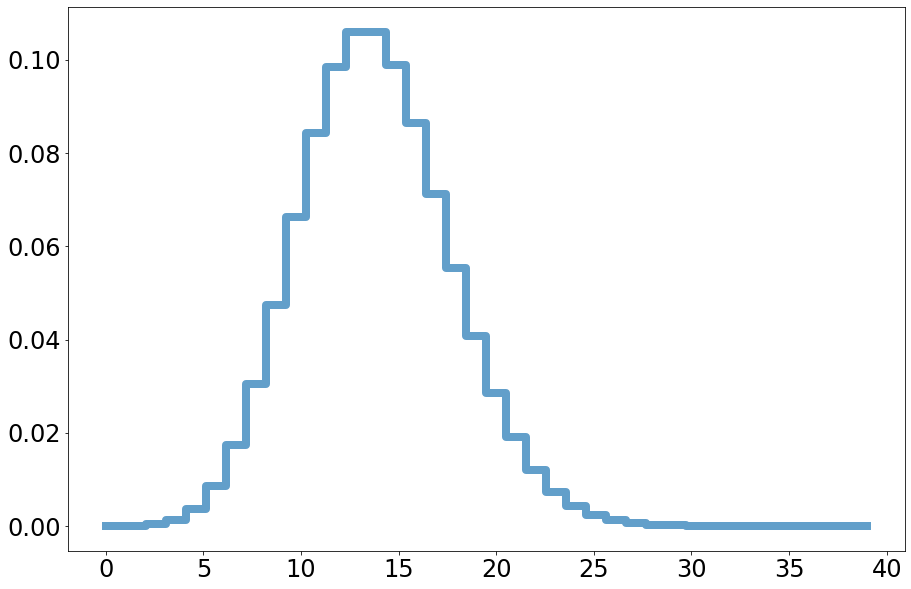

In [308]:
# Sum (convolve) the equation once (2 days)
conv_2 = np.convolve(data_array, data_array)
plt.tick_params(labelsize = 24)
# In each day we have a possibilily of getting a number between 0 and 20, so for two days it will be between 0 and 40.
x = np.arange(0,20*2,20*2/len(conv_2))
plt.step(x, conv_2, linewidth = 8,alpha = 0.7)

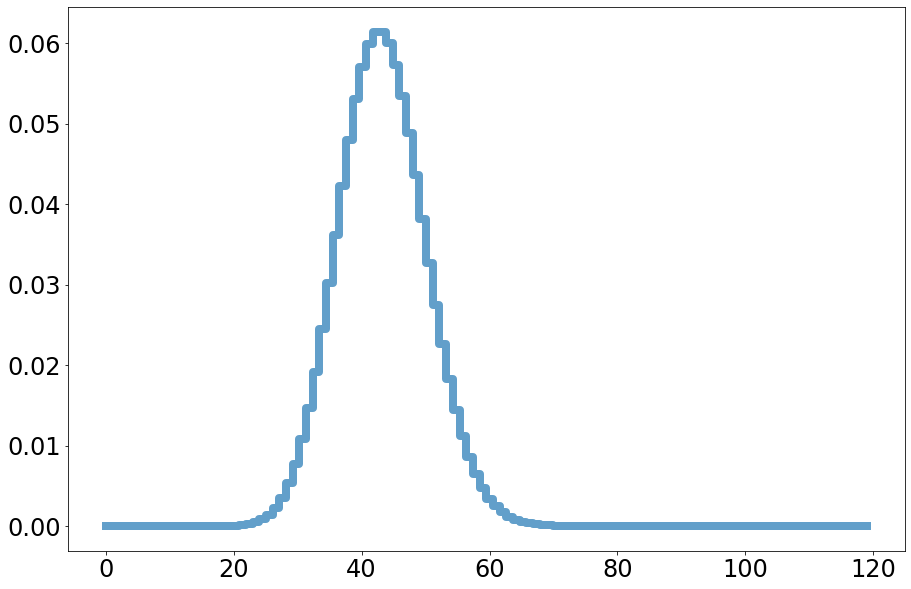

In [309]:
# Sum (convolve) the equation 5 times (6 days)
conv_5 = data_array
for i in np.arange(0,5):
    conv_5= np.convolve(conv_5, data_array)
plt.tick_params(labelsize = 24)
x = np.arange(0,20*6, 20*6/len(conv_5))
plt.step(x, conv_5, linewidth = 8,alpha = 0.7)

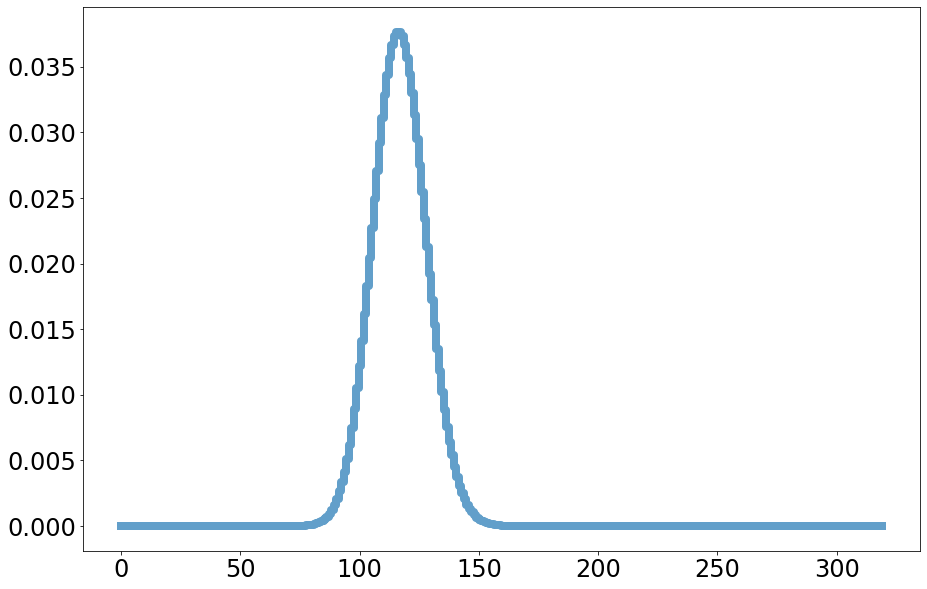

In [310]:
# Sum (convolve) the equation 15 times (16 days)
conv_15 = data_array
for i in np.arange(0,15):
    conv_15= np.convolve(conv_15, data_array)
plt.tick_params(labelsize = 24)
x = np.arange(0,20*16,20*16/len(conv_15))
plt.step(x, conv_15, linewidth = 8,alpha = 0.7)

## B

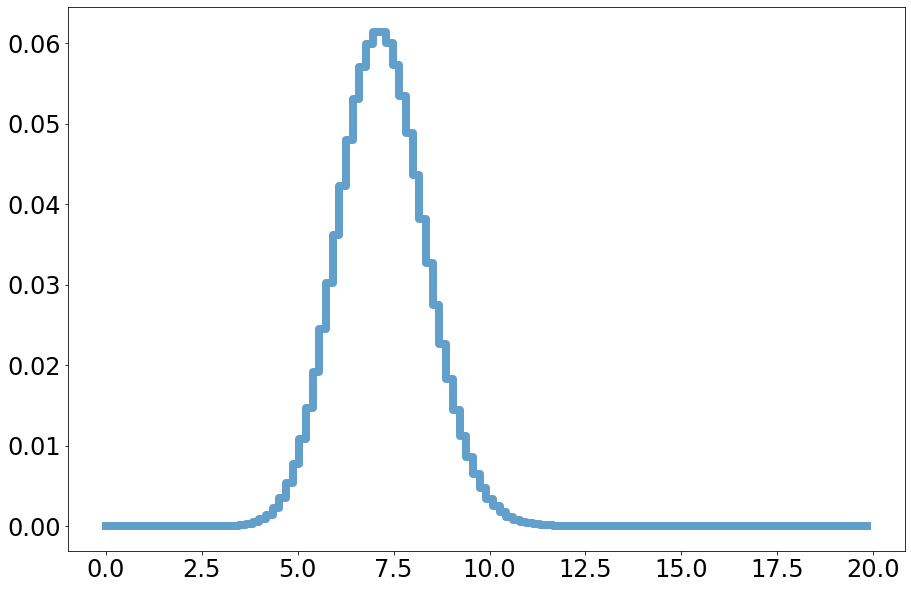

In [311]:
# After 5 days
conv_5 = data_array
for i in np.arange(0,5):
    conv_5= np.convolve(conv_5, data_array)
plt.tick_params(labelsize = 24)
x = np.arange(0,20,20/len(conv_5))
plt.step(x, conv_5, linewidth = 8,alpha = 0.7)

Mathematical: The pdf function for a Poisson distribution is exponential so scaling a pdf function of a Poission by a fixed factor still yields a pdf function of a Poission distribution.

Conceptual: The Poisson distribution pdf describes the probability number of events happened on a single day, and summing multiple of the same pdf is just the probability of the same events happened over a longer time period, which is still conceptually the same type of activity as the original Poisson distribution.

## C

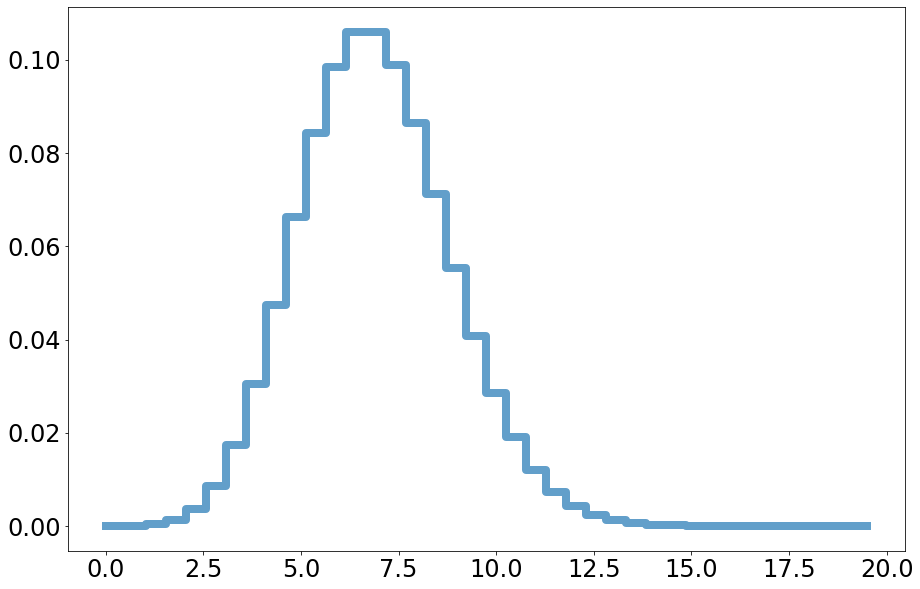

In [312]:
# Averaging over the first 2 days
conv_2 = np.convolve(data_array, data_array)
plt.tick_params(labelsize = 24)
# Since the values are being averaged over time, the maximum value one can reach is the same as a single day entry.
x = np.arange(0,20,20/len(conv_2))
plt.step(x, conv_2, linewidth = 8,alpha = 0.7)

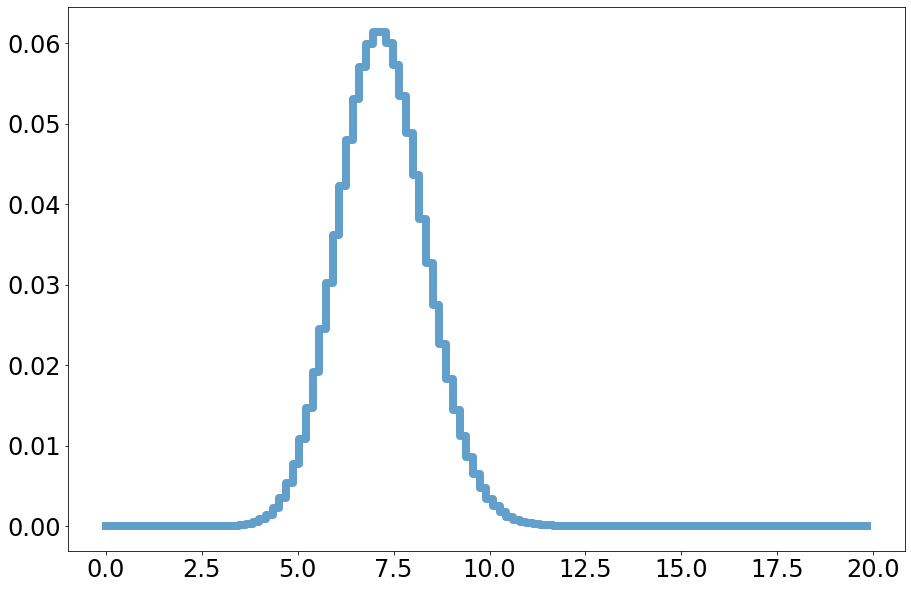

In [313]:
# Averaging over the first 6 days
conv_5 = data_array
for i in np.arange(0,5):
    conv_5= np.convolve(conv_5, data_array)
plt.tick_params(labelsize = 24)
x = np.arange(0,20, 20/len(conv_5))
plt.step(x, conv_5, linewidth = 8,alpha = 0.7)

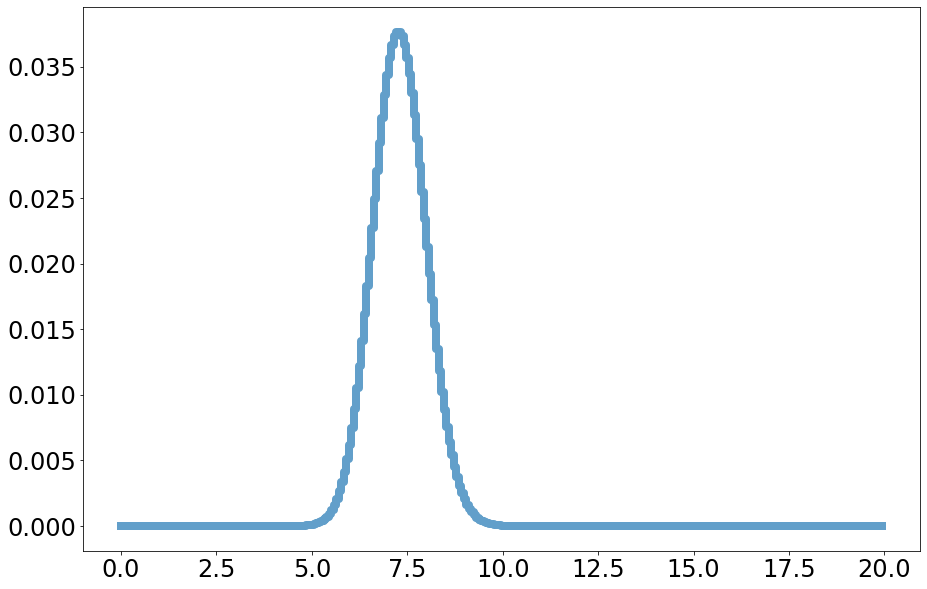

In [314]:
# Sum (convolve) the equation 15 times (16 days)
conv_15 = data_array
for i in np.arange(0,15):
    conv_15= np.convolve(conv_15, data_array)
plt.tick_params(labelsize = 24)
x = np.arange(0,20,20/len(conv_15))
plt.step(x, conv_15, linewidth = 8,alpha = 0.7)

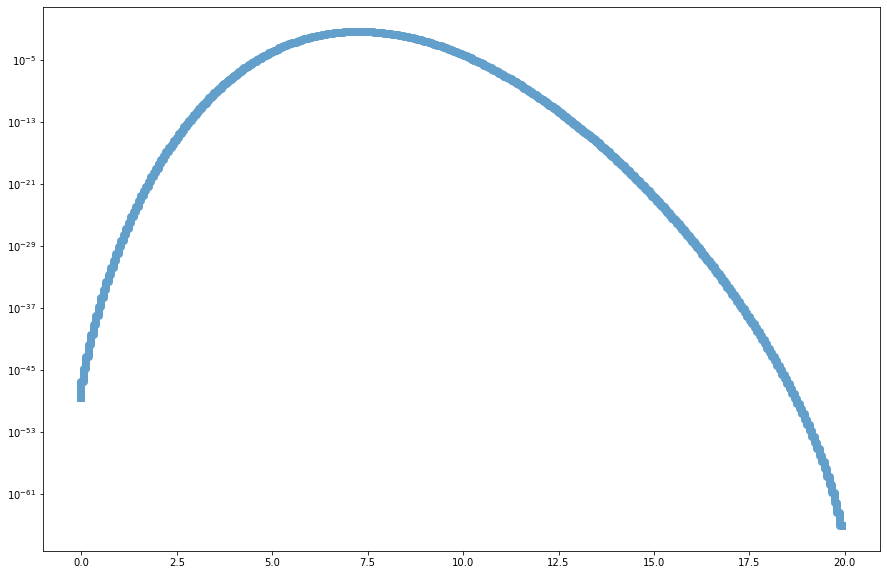

In [315]:
#Plots for 16 days, on a semi-log plot
plt.yscale('log')
x = np.arange(0,20,20/len(conv_15))
plt.step(x, conv_15, linewidth = 8,alpha = 0.7)
# It looks like a parabola under s

As the number of days become larger, the plot becomes narrower around the average value.

Since the average is just the sum divided by the number of days, each **averaged** probability distribution over a certain number of days is the same as the of the same shape as the **summed** probability distribution over the same number of days. (The only difference is the x-axis scale.

The *Central Limit Theorem* establishes that often when independent random variables are added, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed. (Reference from *Wikipedia*). 

From observation, the Poisson distribution does not start out like a normal distribution, but averaging or summing the data over a period of time generates a graph that looks like a normal distribution. 

## D

2.3278703304795585e-28
10.98217561265291


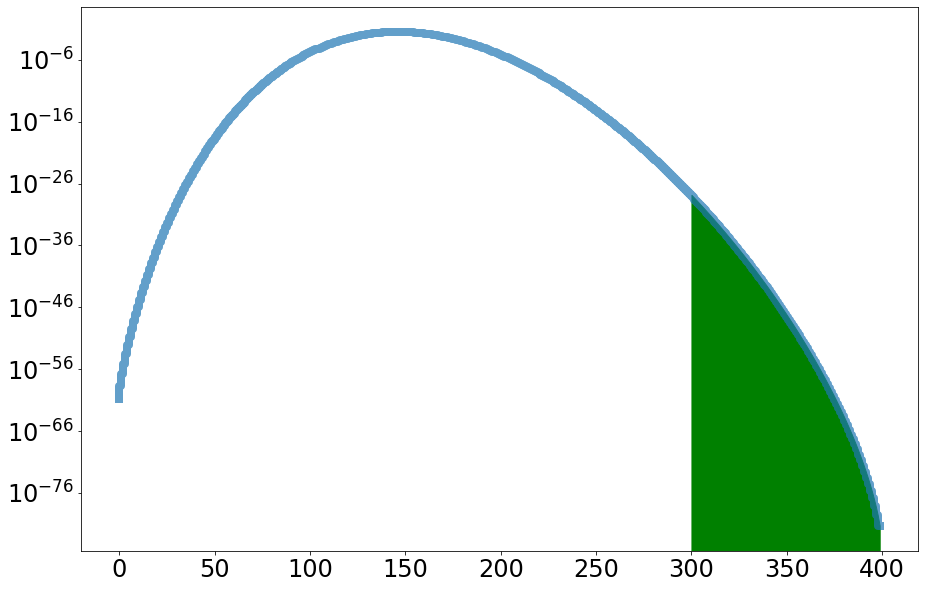

In [410]:
# Assume we're looking at a data after 20 days, and we recieved 20*y gamma rays from our source.
conv_19 = data_array
for i in np.arange(0,19):
    conv_19= np.convolve(conv_19, data_array)
plt.tick_params(labelsize = 24)
plt.yscale('log')
x = np.arange(0,20*20,20*20/len(conv_19))
plt.step(x, conv_19, linewidth = 8,alpha = 0.7)
observation = 20 * y

# Search sorted returns the index where observation needs to be inserted to maintain order
# This corresponds to the first index corresponding to a value >= observation 
index_first = x.searchsorted(observation)
sum_selected = conv_19[index_first:]
x_selected = x[index_first:]
#plt.step(x_selected, sum_selected, linewidth = 8,alpha = 5.7)
plt.fill_between(x_selected, 0, sum_selected, color="green")

# Find the area under the curve by summing the terms because the distribution is discrete
percentage = sum(sum_selected)
print(percentage)

#Find p-value:
sigma_a = sigma(percentage)
print(sigma_a)

# 2

1.001001001001001


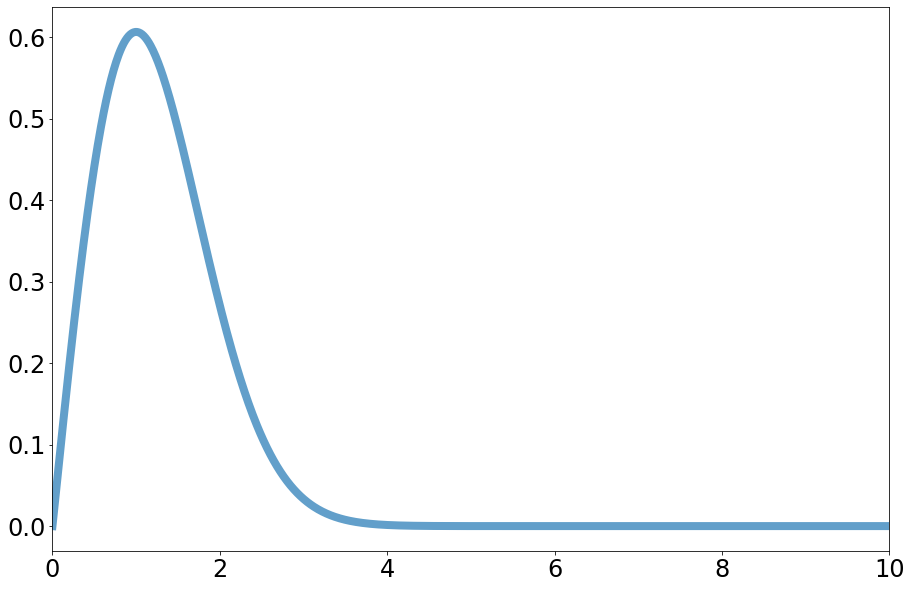

In [317]:
# Setup Rayleigh distribution function
rayleigh_data = np.zeros(1000)
x = np.linspace(0,10,1000)
for i in np.arange(0,1000):
    rayleigh_data[i] = stats.rayleigh.pdf(x[i], loc=0, scale=1)
    
plt.tick_params(labelsize = 24)
plt.xlim([0,10])
plt.plot(x,rayleigh_data,linewidth = 8,alpha = 0.7)

#Find X value for maximum y
max_index = rayleigh_data.argmax()
x_max = x[max_index]
print(x_max)


## A

1.1411411411411412


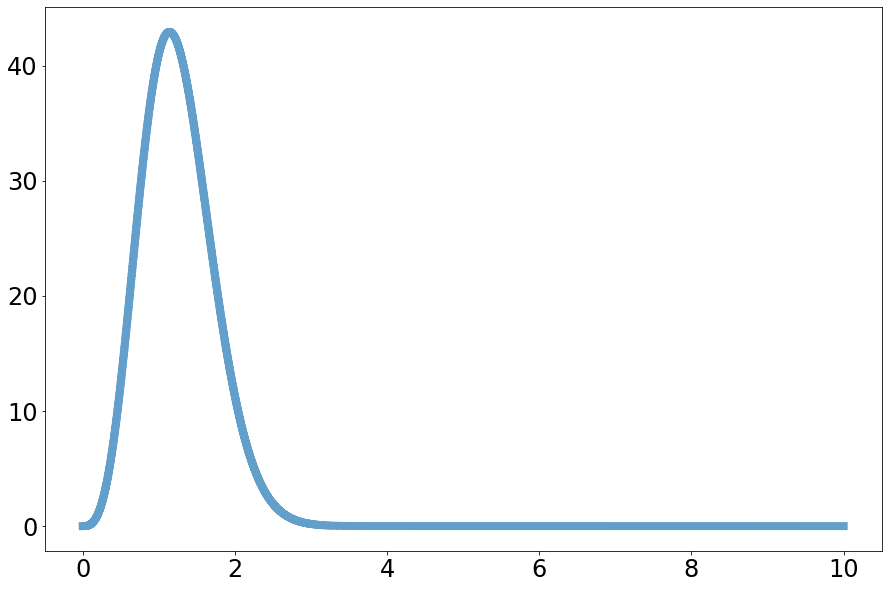

In [318]:
# Convolve once

r_conv = np.convolve(rayleigh_data, rayleigh_data)
plt.tick_params(labelsize = 24)
x = np.linspace(0,10,len(r_conv))
plt.step(x, r_conv, linewidth = 8,alpha = 0.7)

#Find X value for maximum y
max_index = r_conv.argmax()
x_max = x[max_index]
print(x_max)

1.2205823693657758


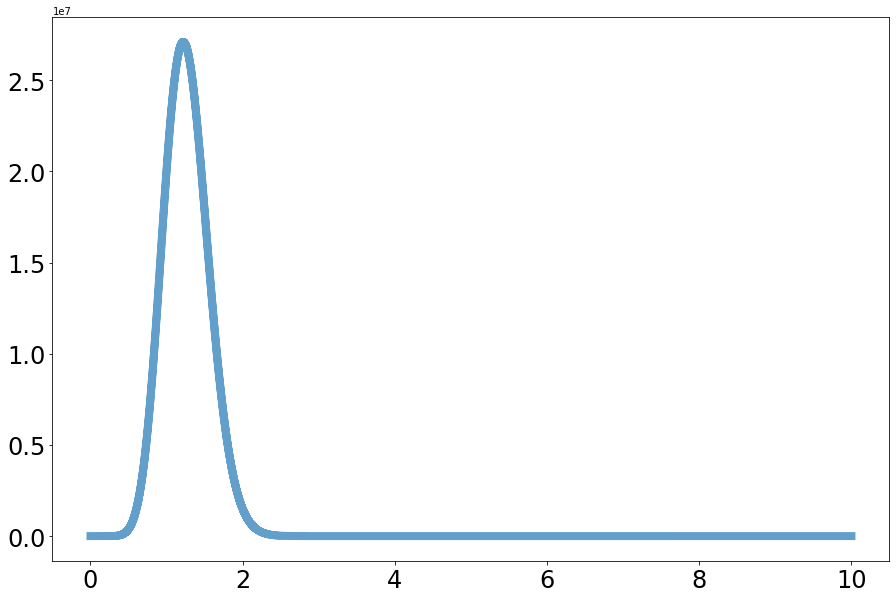

In [319]:
# Convolve 5 times
r_conv = data_array
for i in np.arange(0,5):
    r_conv= np.convolve(r_conv, rayleigh_data)
plt.tick_params(labelsize = 24)
x = np.linspace(0,10,len(r_conv))
plt.step(x, r_conv, linewidth = 8,alpha = 0.7)

#Find X value for maximum y
max_index = r_conv.argmax()
x_max = x[max_index]
print(x_max)

1.2477908566474374


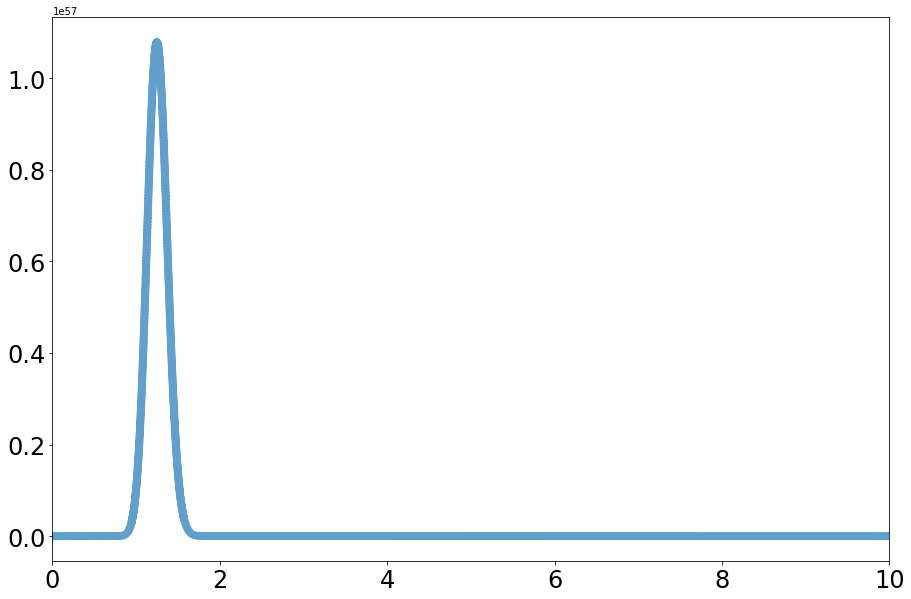

In [321]:
# Convolve 30 times
r_conv = data_array
for i in np.arange(0,30):
    r_conv= np.convolve(r_conv, rayleigh_data)
plt.tick_params(labelsize = 24)
plt.xlim([0,10])
x = np.linspace(0,10,len(r_conv))
plt.step(x, r_conv, linewidth = 8,alpha = 0.7)

#Find X value for maximum y
max_index = r_conv.argmax()
x_max = x[max_index]
print(x_max)

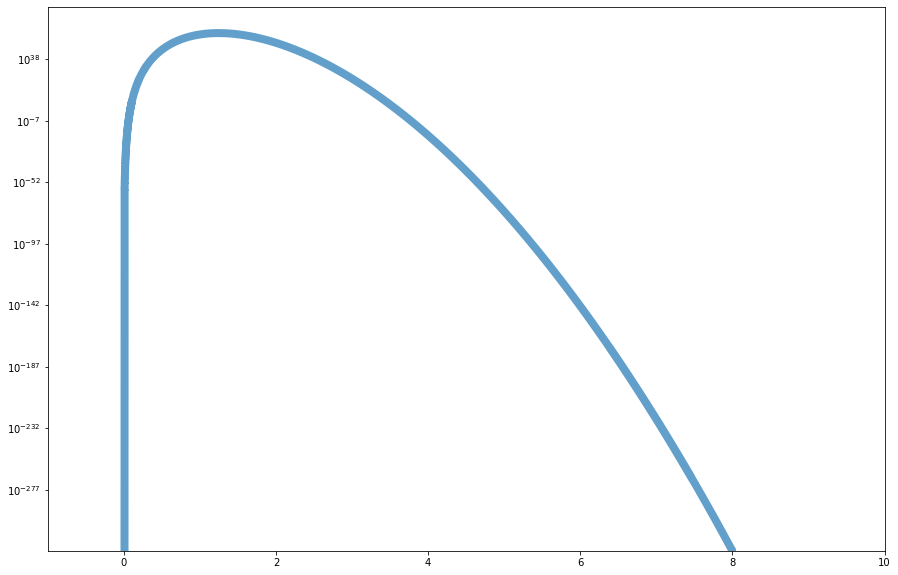

In [322]:
# Same data as above, but in Semi-log
plt.yscale('log')
plt.xlim([-1,10])
x = np.linspace(0,10,len(r_conv))
plt.step(x, r_conv, linewidth = 8,alpha = 0.7)

The distribution becomes narrower and closer to a Gaussian distribution, with the average centering around 1.247.


## B

The shape does approach a Gaussian distribution. I did not test every interval but it seems like the plot looks close enough to a Gaussian after 5 intervals.

# 3

## A

We assume the width is 0.7 and we see a strength of 2.15.

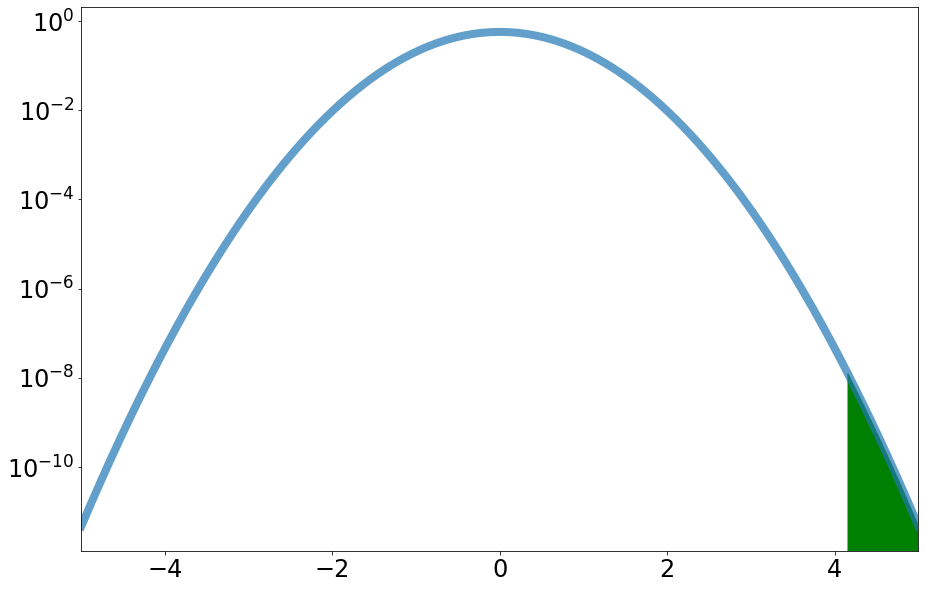

In [388]:
width = 0.7
strength = 4.15

ligo = np.zeros(1000)
x = np.linspace(-5, 5, 1000)
for i in np.arange(0,1000):
    ligo[i] = stats.norm.pdf(x[i], loc = 0., scale = width)
    
# Plot the gaussian in Semi-log
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([-5,5])
plt.plot(x, ligo, linewidth = 8,alpha = 0.7)

# Plot the cdf region
index_first = x.searchsorted(strength)
ligo_selected = ligo[index_first:]
x_selected = x[index_first:]
plt.fill_between(x_selected, 0, ligo_selected, color="green")


In [411]:
#Find the survival function (1-cdf) and p value:
p = stats.norm.sf(strength, loc=0, scale= width)
print(p)
sigma_a = sigma(p)
print(sigma_a)

1.5279074195997087e-09
5.92857142857143


We can claim a discovery because the significance of our discovery is 5.93 sigma.

## B

Question:

If the probability distribution of the background of each pixel in 10,000 pixels is the same as the pixel in part A, what's the probability that the data produces a signal that's equally or more signal-like than what I observed of the range of all 10,000 pixels?

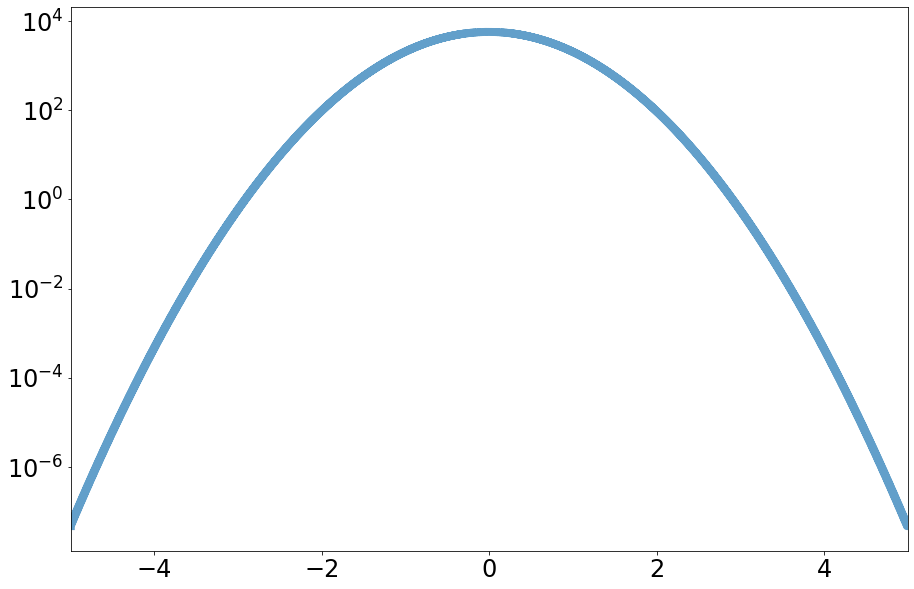

In [412]:
# Convolve 10,000 times takes too long to complete.
# The probability of our signal is tiny (10 ** -9) that
#     P(A_1 OR A_2 OR ... OR A_10000) = P(A_1) + P(A_2) + ... +P(A_10000)
# In our case, P(A_1) = P(A_2) = ... = P(A_10000), 
#    so P(A_1 OR A_2 OR ... OR A_10000) = P(A_1) * 10000
# So we can just multiply our signal by the total # of pixels.

ligo_10k = ligo * 10000
plt.yscale('log')
plt.xlim([-5,5])
plt.tick_params(labelsize = 24)
x = np.linspace(-5, 5, 1000)
plt.step(x, ligo_10k, linewidth = 8,alpha = 0.7)

In [413]:
# Since the entire function's y value is just the original multiplied by 10k, so the integral will also be multiplied by 10k
p = stats.norm.sf(strength, loc=0, scale = width) * 10000
print(p)
sigma_a = sigma(p)
print(sigma_a)

1.5279074195997088e-05
4.169266516734744


Our sigma value now falls below 5 so we may not claim a discovery.

# 4

In [434]:
# Probability for 5 sigma:
p_5sig = stats.norm.sf(5, loc=0, scale=1)
p_5sig

2.866515718791933e-07

## A

In [435]:
signal_req_v1 = stats.norm.isf(p_5sig, loc=0, scale = width)
signal_req_v1

3.5000000000000004

## B

In [436]:
# The probability is multiplied by 10k for version 2, so before using isf we must divide the probability by 10k.
signal_req_v2 = stats.norm.isf(p_5sig / 10000, loc=0, scale = width)
signal_req_v2

4.585376328893734

## C

In [437]:
diff = signal_req_v2 - signal_req_v1
diff

1.0853763288937333

The signal must be 1.085 brighter than for a trial factor of 10K. 

The sensitivity in our penalty is low because the data that's equally or more signal-like what our signal lies towards the end of a Gaussian distribution and the probability is at factors of 10^(-9), even when it's multiplied by 10^5 it's still 10^(-4), which is a small probability, thus the sensitivity penalty is not large.

## D

In [438]:
#Assume we have a trial factor of 100
signal_req_v100 = stats.norm.isf(p_5sig / 100, loc=0, scale = width)
signal_req_v100

4.077055181155904

In [439]:
#Assume we have a trial factor of 10 ** 6
signal_req_v10e6 = stats.norm.isf(p_5sig / (10 ** 6), loc=0, scale = width)
signal_req_v10e6

5.04467967038687

In [441]:
#Assume we have a trial factor of 10 ** 8
signal_req_v10e8 = stats.norm.isf(p_5sig / (10 ** 8), loc=0, scale = width)
signal_req_v10e8

5.466780692533415

The larger our trials factor is, the larger the sensitivity penalty is.

## Extra credit

Assume we have an Elrange distribution instead.

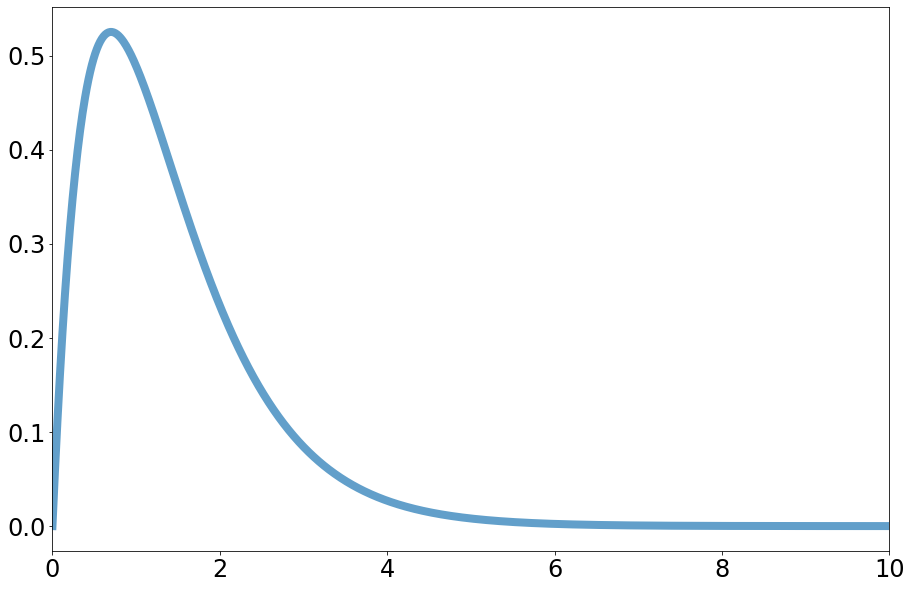

In [456]:
width = 0.7
a = 2

elr = np.zeros(1000)
x = np.linspace(0, 10, 1000)
for i in np.arange(0,1000):
    elr[i] = stats.erlang.pdf(x[i], a, loc = 0., scale = width)
    
plt.tick_params(labelsize = 24)
plt.xlim([0,10])
plt.plot(x, elr, linewidth = 8,alpha = 0.7)


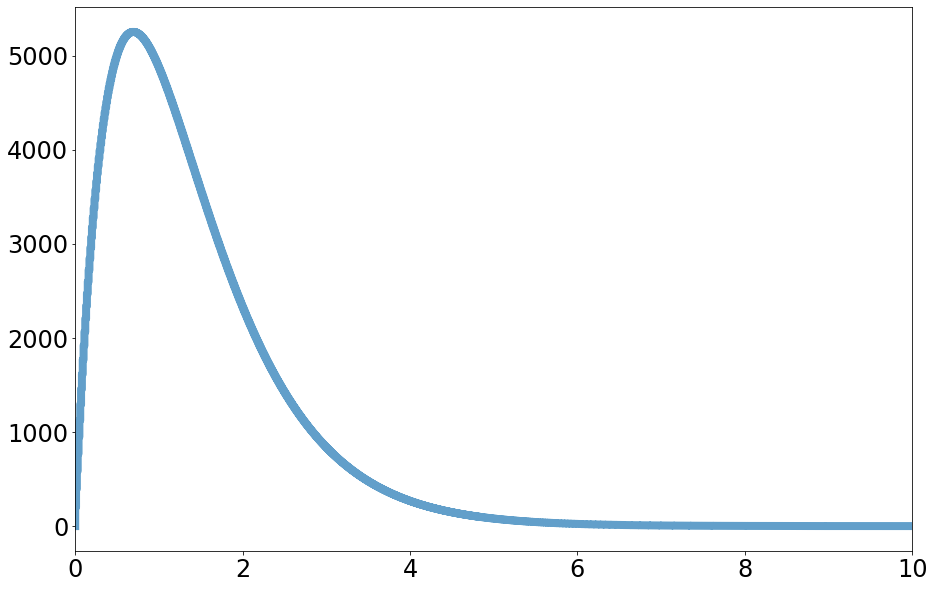

In [449]:
# Multiply by 10k
elr_10k = elr * 10000
plt.xlim([0,10])
plt.tick_params(labelsize = 24)
x = np.linspace(0, 10, 1000)
plt.step(x, elr_10k, linewidth = 8,alpha = 0.7)

In [454]:
# Required signal for 5-sigma in the original
signal_req_elr = stats.erlang.isf(p_5sig, a, loc=0, scale = width)
signal_req_elr

12.606973068532609

In [455]:
# Required signal for 5-sigma in the 10k trials factor case
signal_req_elr_10k = stats.erlang.isf(p_5sig / 10000, a, loc=0, scale = width)
signal_req_elr_10k

19.340849886526144

In [457]:
diff = signal_req_elr_10k - signal_req_elr
diff

6.733876817993535

We can see the differences are much larger than the normal distribution.

This is because the Elrang distribution has a larger "tail" to the right, so the same signal value corresponds to a larger probability than the normal distribution.

So, when scaled 10k times, the differences in probability with and without the trials factor are larger than the normal distribution, and will thus have a larger sensitivity penalty.